# Assignment: Compresive Strength Concrete Problem


### Abstract: 

Concrete is the most important material in civil engineering. The concrete compressive strength (concrete strength to bear the load) is a highly nonlinear function of age and ingredients.  <br><br>

<table border="1"  cellpadding="6" bordercolor="red">
	<tbody>
        <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Data Set Characteristics:&nbsp;&nbsp;</b></p></td>
		<td><p class="normal">Multivariate</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Instances:</b></p></td>
		<td><p class="normal">1030</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Area:</b></p></td>
		<td><p class="normal">Physical</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">
    <tbody>
        <tr>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Attribute Characteristics:</b></p></td>
            <td><p class="normal">Real</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Number of Attributes:</b></p></td>
            <td><p class="normal">9</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Date Donated</b></p></td>
            <td><p class="normal">2007-08-03</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">	
    <tbody>
    <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Associated Tasks:</b></p></td>
		<td><p class="normal">Regression</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Missing Values?</b></p></td>
		<td><p class="normal">N/A</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Web Hits:</b></p></td>
		<td><p class="normal">231464</p></td>
	</tr>
    </tbody>
    </table>

###  Description:
| Features Name | Data Type | Measurement | Description |
| -- | -- | -- | -- |
Cement (component 1) | quantitative | kg in a m3 mixture | Input Variable
Blast Furnace Slag (component 2) | quantitative | kg in a m3 mixture | Input Variable
Fly Ash (component 3) | quantitative | kg in a m3 mixture | Input Variable
Water (component 4) | quantitative | kg in a m3 mixture | Input Variable
Superplasticizer (component 5) | quantitative | kg in a m3 mixture | Input Variable
Coarse Aggregate (component 6) | quantitative | kg in a m3 mixture | Input Variable
Fine Aggregate (component 7) | quantitative | kg in a m3 mixture | Input Variable
Age | quantitative | Day (1~365) | Input Variable
Concrete compressive strength | quantitative | MPa | Output Variable

### WORKFLOW :
- Load Data
- Check Missing Values ( If Exist ; Fill each record with mean of its feature )
- Standardized the Input Variables. **Hint**: Centeralized the data
- Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).
- Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).
- Compilation Step (Note : Its a Regression problem , select loss , metrics according to it)
- Train the Model with Epochs (100) and validate it
- If the model gets overfit tune your model by changing the units , No. of layers , activation function , epochs , add dropout layer or add Regularizer according to the need .
- Evaluation Step
- Prediction


# Load Data:
[Click Here to Download DataSet](https://github.com/ramsha275/ML_Datasets/blob/main/compresive_strength_concrete.csv)

In [1]:
import pandas as pd
import numpy as np
from tensorflow.keras import layers
from tensorflow.keras import models
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from scipy import stats


INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [2]:
data = pd.read_csv('compresive_strength_concrete.csv')
data.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

In [4]:
data.isnull().sum()
#no null values

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

In [5]:
#split the input and output data
X_data = data.iloc[:,:-1].astype('float32')
y_data = data.iloc[:,-1].astype('float32')
X_data.head(2)

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day)
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28.0
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28.0


In [6]:
#to standardize the input data we use z-score
mean = np.mean(X_data, axis=0)
std = np.std(X_data, axis=0)
zScore = (X_data-mean)/std
zScore.head(2)

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day)
0,2.477915,-0.85689,-0.847139,-0.916772,-0.620446,0.863153,-1.217672,-0.279733
1,2.477915,-0.85689,-0.847139,-0.916772,-0.620446,1.056163,-1.217672,-0.279733


In [10]:
X_data = zScore

<h3>Train Test Split</h3>

In [123]:
#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=23)
                                        

<h3>Buiding Neural Networks</h3>

In [137]:
def build_compile_model(act, opti):
    from tensorflow.keras import regularizers
    print('*****************************')
    print(f'Activation Function = {act}')
    print(f'Optimizer = {opti}')
    dnn_model = models.Sequential()
    dnn_model.add(layers.Dense(64, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001),activation=act,input_shape=(X_train.shape[1],)))
    dnn_model.add(layers.Dropout(0.4))
    dnn_model.add(layers.Dense(1))
    dnn_model.compile(optimizer=opti, loss='mse', metrics=['mae'])
    return dnn_model

In [138]:
def train_predict_evaluate(dnn_model, batch, epoch):
    
    print(f'Batch size = {batch}')
    print(f'Number of epochs = {epoch}')
    print('*****************************')
    dnn_model.fit(X_train, y_train, batch_size=batch, validation_split=0.2, epochs = epoch, verbose = 0)
    
    #keep track of training history to find best epoch 
    val_mae_per_epoch = dnn_model.history.history['val_mae']
    best_epoch = val_mae_per_epoch.index(min(val_mae_per_epoch)) + 1
    print('Lowest MAE on epoch#: %d' % (best_epoch,))
    print('Check Learning Curve of Train vs Validation Loss to determine underfitting, overfitting and bestfitting')
    plt.plot(dnn_model.history.history['loss'])
    plt.plot(dnn_model.history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train-loss', 'val-loss'], loc='upper left')
    plt.show()
    
    #plot Mean Absolute Error
    plt.plot(dnn_model.history.history['mae'])
    plt.plot(dnn_model.history.history['val_mae'])
    plt.title('model MAE')
    plt.ylabel('mae')
    plt.xlabel('epoch')
    plt.legend(['train-loss', 'val-loss'], loc='upper left')
    plt.show()
    
    # Evaluate model and make data frame of acutal test values and predicted test values
    evaluate = dnn_model.evaluate(X_test, y_test)
    y_pred = dnn_model.predict(X_test)
    y_new_test = np.array(y_test).flatten().reshape(len(y_test),1)
    predicted_data = np.concatenate((y_pred, y_new_test), axis=1)
    predicted_df = pd.DataFrame(predicted_data, columns=['Predicted_Test', 'Actual_Test'])
    diff = np.abs(predicted_df.Actual_Test - predicted_df.Predicted_Test)
    predicted_df['Absolute_Error'] = diff
    r2score = (r2_score(predicted_df.Actual_Test, predicted_df.Predicted_Test))*100
    print(f'r^2 score = {round(r2score,1)}%')
    print('Mean Absolute Error =',round(np.mean(predicted_df['Absolute_Error']),2))
    print(predicted_df)
    
    # print the linear regression and display datapoints
    from sklearn.linear_model import LinearRegression  
    regressor = LinearRegression()  
    regressor.fit(y_new_test, y_pred)
    y_fit = regressor.predict(y_pred)
    reg_intercept = round(regressor.intercept_[0],4)
    reg_coef = round(regressor.coef_.flatten()[0],4)
    reg_label = "y = " + str(reg_intercept) + "*x +" + str(reg_coef)
    plt.scatter(y_new_test, y_pred, color='blue', label= 'data')
    plt.plot(y_pred, y_fit, color='red', linewidth=2, label = 'Linear regression\n'+reg_label) 
    plt.title('Linear Regression')
    plt.legend()
    plt.xlabel('observed')
    plt.ylabel('predicted')
    plt.show()

*****************************
Activation Function = tanh
Optimizer = sgd
Batch size = 32
Number of epochs = 300
*****************************
Lowest MAE on epoch#: 222
Check Learning Curve of Train vs Validation Loss to determine underfitting, overfitting and bestfitting


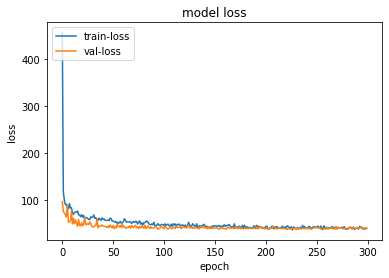

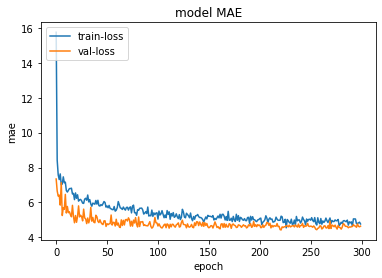

10/10 [==============================] - 0s 864us/step - loss: 35.0608 - mae: 4.4083
r^2 score = 87.9%
Mean Absolute Error = 4.41
     Predicted_Test  Actual_Test  Absolute_Error
0         42.441826    36.799999        5.641827
1          9.609606    11.580000        1.970394
2         69.204414    71.699997        2.495583
3         14.045361    19.520000        5.474640
4         19.337170    17.580000        1.757170
..              ...          ...             ...
304       46.162750    44.700001        1.462749
305       33.170132    33.689999        0.519867
306       30.226477    29.219999        1.006477
307       19.066502    12.460000        6.606502
308       32.777893    42.799999       10.022106

[309 rows x 3 columns]


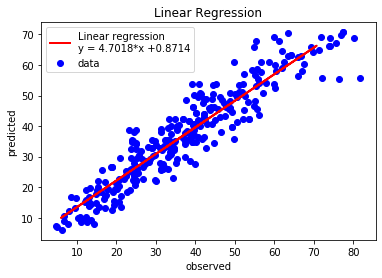

In [139]:
train_predict_evaluate(build_compile_model('tanh', 'sgd'),32,300)